In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import Birch
from sklearn.decomposition import PCA

In [2]:
calls=pd.read_csv(r'/Users/angelaivonnesalgadobeltran/Documents/IronHack/Final project/cleaning_data/final_data_calls.csv')

1.Drop the columns that have non numeric data in order to build the model

In [3]:
calls_model = calls.drop(columns=['prov_residencia_persona_en_situacion_violencia',
       'genero_persona_en_situacion_de_violencia', 'tipo_de_violencia_fisica',
       'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual',
       'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modalidad_violencia_contra_libertad_reproductiva',
       'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica',
       'modalidad_de_violencia_otras', 'vinculo_con_la_persona_agresora',
       'genero_de_la_persona_agresora', 'Unnamed: 0', 'Unnamed: 0.1', 'fecha'])

In [4]:
def evaluation (X, labels):
    print("Silhouette Coefficient: ", metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    print("Variance Ratio Criterion: ", metrics.calinski_harabasz_score(X, labels))

2. Elbow 

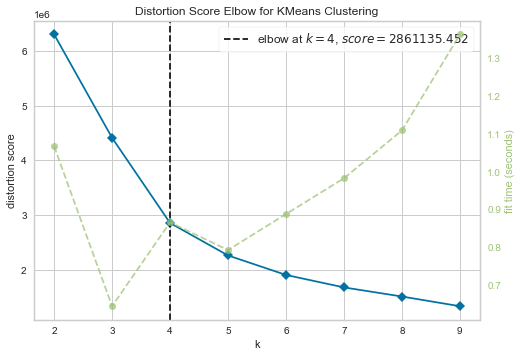

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
#Using KElbowVisualizer to get the optimal number of cluster for our model (Kmeans) - don't worry about the error warnings
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(calls_model)
visualizer.poof()

Kmean Model

In [14]:
# kmeans = KMeans(n_clusters=5, random_state=0).fit(calls_model)
# cluster_centers= kmeans.cluster_centers_
# labels = kmeans.labels_

In [17]:
# evaluation (calls_model, labels)

Silhouette Coefficient:  0.59420645534888
Variance Ratio Criterion:  57711.59767454197


In [6]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(calls_model)
cluster_centers= kmeans.cluster_centers_
labels = kmeans.labels_

evaluation (calls_model, labels)

Silhouette Coefficient:  0.616486719501484
Variance Ratio Criterion:  56903.50088262132


In [8]:
calls_model['labels_kmeans'] = kmeans.labels_
calls_model['labels_kmeans'].value_counts()

1    25982
0    17369
2     8770
3     7239
Name: labels_kmeans, dtype: int64

In [9]:
calls_model.to_csv('calls_k_mean_model.csv')

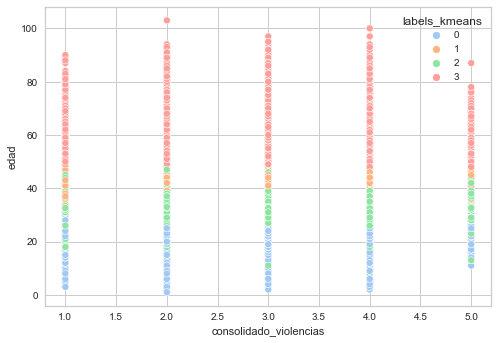

In [9]:
from matplotlib import pyplot as plt


sns.scatterplot(data=calls_model, x='consolidado_violencias', y='edad', hue='labels_kmeans', palette='pastel')
plt.show()

In [35]:
pca_calls_model=calls_model.drop(['labels_kmeans'], axis=1)

In [57]:
pca_calls_model

,media_edad,edad,prov_residencia_persona_en_situacion_violencia_encode,genero_persona_en_situacion_de_violencia_encode,tipo_de_violencia_fisica_encode,tipo_de_violencia_psicologica_encode,tipo_de_violencia_sexual_encode,tipo_de_violencia_economica_y_patrimonial_encode,tipo_de_violencia_simbolica_encode,tipo_de_violencia_domestica_encode,modalidad_de_violencia_institucional_encode,modalidad_de_violencia_laboral_encode,modalidad_violencia_contra_libertad_reproductiva_encode,modalidad_de_violencia_obstetrica_encode,modalidad_de_violencia_mediatica_encode,modalidad_de_violencia_otras_encode,vinculo_con_la_persona_agresora_encode,genero_de_la_persona_agresora_encode,consolidado_violencias
0,33.482798,33.482798,22,1,1,1,0,0,0,1,0,0,0,0,0,0,5,7,3
1,33.482798,34.000000,22,1,0,1,0,1,1,1,0,0,0,0,0,0,0,7,3
2,33.482798,22.000000,22,1,0,1,0,0,0,1,0,0,0,0,0,0,5,7,2
3,33.482798,38.000000,22,1,1,1,0,0,0,1,0,0,0,0,0,0,5,7,3
4,33.482798,28.000000,22,1,1,1,1,1,0,1,0,0,0,0,0,0,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59355,32.601307,31.000000,10,1,1,1,0,0,0,1,0,0,0,0,0,0,0,7,3
59356,32.601307,29.000000,10,1,1,1,0,1,0,1,0,0,0,0,0,0,5,7,4
59357,32.601307,19.000000,10,1,1,1,0,0,0,1,0,0,0,0,0,0,0,7,3
59358,32.601307,26.000000,10,1,1,1,0,1,0,1,0,0,0,0,0,0,5,7,4


In [58]:
pca = PCA(n_components=2)
x=pca.fit_transform(pca_calls_model)


In [59]:
x

array([[ -3.59095816,  18.82322594],
       [ -3.13323617,  18.84579897],
       [-15.04053209,  18.09385347],
       ...,
       [-17.39473375,   6.20014214],
       [-10.34364954,   6.64459996],
       [-11.39721301,   6.55017262]])

In [60]:
kmeans = KMeans(n_clusters=4).fit(x)
cluster_centers= kmeans.cluster_centers_
labels2 = kmeans.labels_


In [62]:
evaluation (x, labels2)

Silhouette Coefficient:  0.6657773553261989
Variance Ratio Criterion:  68776.73259605843


In [64]:
x

array([[ -3.59095816,  18.82322594],
       [ -3.13323617,  18.84579897],
       [-15.04053209,  18.09385347],
       ...,
       [-17.39473375,   6.20014214],
       [-10.34364954,   6.64459996],
       [-11.39721301,   6.55017262]])

In [65]:
x1=pd.DataFrame(x)

In [67]:
x1["labels_kmeans"]=labels2

In [68]:
x1.columns=["c1", "c2",'labels_kmeans' ]

In [69]:
x1.labels_kmeans.value_counts()

2    25983
1    17368
3     8762
0     7247
Name: labels_kmeans, dtype: int64

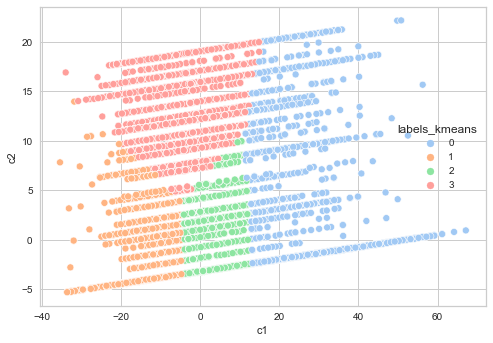

In [70]:
sns.scatterplot(data=x1, x="c1", y="c2", hue='labels_kmeans', palette='pastel')
plt.show()

# ----------DBScan-----------

In [ ]:
calls_model_dbs=calls_model.drop(['labels_kmeans'], axis=1)
dbscan = DBSCAN(eps=0.2, min_samples=500).fit(calls_model_dbs)
calls_model_dbs['labels_DBSCAN'] = dbscan.labels_
evaluation (calls_model_dbs, dbscan.labels_)

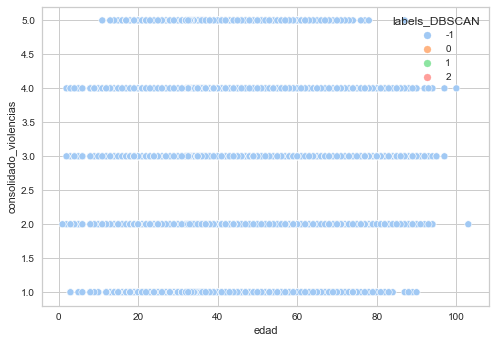

In [60]:
sns.scatterplot(data=calls_model_dbs, x='edad', y='consolidado_violencias', hue='labels_DBSCAN', palette='pastel')
plt.show()

# ----------AgglomerativeClustering-----------

In [12]:
# calls_model_ac=calls_model.drop(['labels_kmeans'], axis=1)
# aggclustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
# aggclustering.fit(calls_model_ac)
# labels_ac = aggclustering.labels_
# calls_model_ac['labels_AC'] = aggclustering.labels_

: 

: 

# ----------Birch-----------

In [21]:
calls_model_birch=calls_model.drop(['labels_kmeans'], axis=1)

brc = Birch(n_clusters=5)
brc.fit(calls_model_birch)
calls_model_birch['labels_birch']=brc.predict(calls_model_birch)


In [22]:
evaluation (calls_model_birch.drop(['labels_birch'], axis=1), calls_model_birch['labels_birch'])

Silhouette Coefficient:  0.4686582077605964
Variance Ratio Criterion:  39971.37379845647


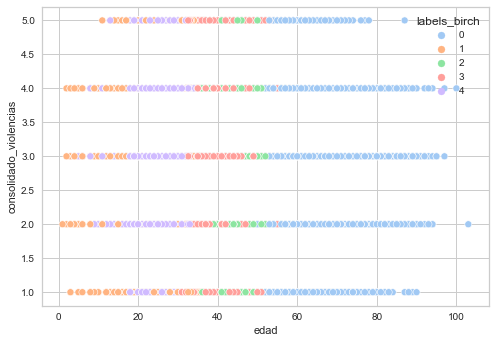

In [24]:
sns.scatterplot(data=calls_model_birch, x='edad', y='consolidado_violencias', hue='labels_birch', palette='pastel')
plt.show()